# LabWise Workshop Notebook











### Networks
- [Try to move individuals](http://mbostock.github.io/d3/talk/20111116/force-collapsible.html)
- [Change the rules and pattern within a network](http://www.redotheweb.com/CodeFlower/)

### The Game of Life
- [Play the Game of Life](http://bl.ocks.org/NPashaP/f1e73faef87bee899b47)

### Fractals
- [Explore a fractal blocks pattern](http://bl.ocks.org/jessihamel/3cb5eec3371f21d26739)
- [Change the rules](https://vicapow.github.io/d3-fractal-art/#%7B%22n%22%3A127%2C%22r%22%3A121%2C%22m%22%3A3%2C%22levels%22%3A4%2C%22thickness%22%3A30%2C%22opacity%22%3A0.5%7D)

### Maps and Resource Flows
- [Concept map with multiple scales](http://www.cotrino.com/2016/03/knowledgemap/)
- [Sankey map of resource flows](http://bl.ocks.org/Neilos/584b9a5d44d5fe00f779)

### Insight Maker Models of System Dynamics
- [Northern income dynamics and demographics](https://insightmaker.com/insight/61464/Clone-of-Northern-Ontario-Demographic-and-Income-Trend-Model)
- [Community eligibility](https://insightmaker.com/insight/61463/Clone-of-Developing-Community-Eligibility-for-Jobs-in-Mining-Sector)

### Agent Based Model of Youth Employment
- [Github repository for python code](https://github.com/tcstewar/employ_game)

### Boids Model of Bird Movement 
- [Boids model (Javascript may require some configuration)](http://www.gmilburn.ca/tag/boid/)

**Boid Movement is Driven By Three Rules**

- *Alignment*: This slider adjusts how much each fish wants to head in the same direction as other fish around it.
- *Cohesion*: This slider adjusts how close each fish wants to be to its neighbors.
- *Separation*: This slider adjust how much each fish wants to space itself out from the others.  [(Source Geoff Milburn)](gmilburn.ca/2010/03/23/in-this-virtual-fish-tank-you-make-the-rules/)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from model import SchellingModel

import holoviews as hv
import numpy as np
hv.notebook_extension()
# hv.archive.auto()

import itertools

### Agent Based Models

In [28]:
from TestLabWiseAgent import DrugMarketModel, Space
time_steps = 10

In [29]:
model = DrugMarketModel(width=2, height=2, no_dealers=2, no_police=2) 
model.run_model(time_steps)

In [30]:
model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()
ts = hv.Curve(model_out['Total Experience'])
ts2_hmap = hv.HoloMap({i: (ts * hv.VLine(i)).relabel(group='Series', label='Time')
                                   for i in range(len(model_out['Total Experience']))}, key_dimensions=['Time'])

In [31]:
sines = {s2_hmap*model_error_range}
my_overlay = hv.NdOverlay(sines , kdims=['Phase']).relabel(group='Phases',
                                                                      label='Sines', depth=1)

NameError: name 's2_hmap' is not defined

In [25]:
def do_another_run_for_error(nx, width, height, no_dealers, no_police):
    mod = DrugMarketModel(width, height, no_dealers, no_police) 
    mod.run_model(nx)  
    mod_out = mod.datacollector.get_model_vars_dataframe()
    return mod_out['Total Experience']

drug_market_stack = hv.HoloMap(kdims=['Number of Dealers','Number of Police'])
for no_dealers, no_police in itertools.product(np.array([1,2,3]), np.array([1,2,4])):
    runs = np.array([do_another_run_for_error(nx=time_steps, width=2, height=2, no_dealers=2, no_police=2) for _ in range(20)])
    drug_market_stack[(no_dealers, no_police)] = hv.TimeSeries(runs, label='Total', group='Experience',
                                         kdims=['Time', 'Observation'])

b':HoloMap   [Number of Dealers,Number of Police]\n   :TimeSeries   [Time,Observation]   (z)'
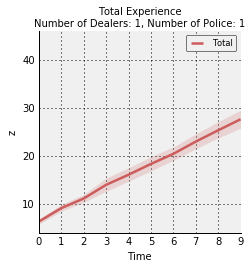
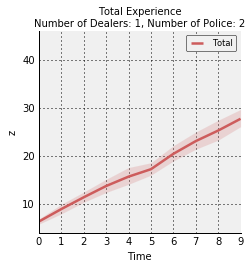
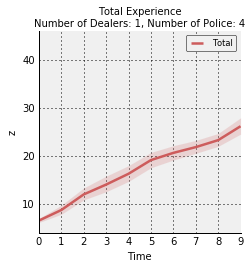
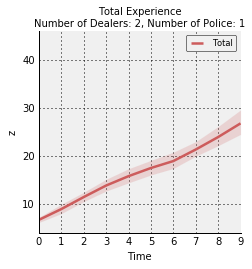
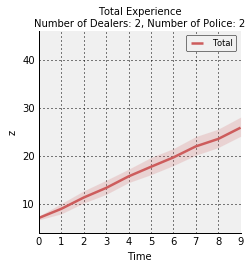
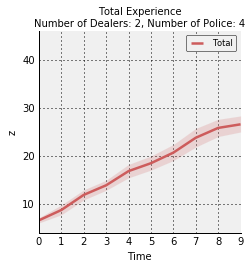
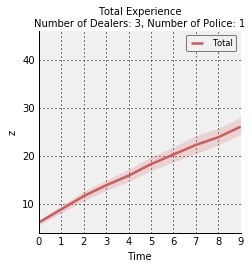
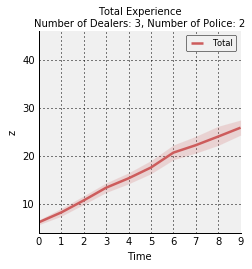
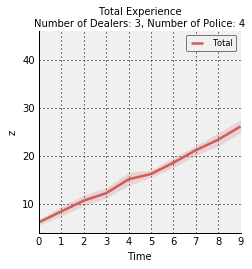

In [20]:
%%opts TimeSeries (ci=95 color='indianred')
drug_market_stack

In [4]:
# Initialize the ABM model
model = SchellingModel(width=5, height=5, threshold=3, population_density=0.8, population_breakdown=0.2)

# Model Arguments
# width:     Width  of the grid containing agents.
# height:    Height of the grid containing agents.
# threshold: Homophily threshold, the number, from 0-8, of nearest neighbours at which I am so unhappy that I move.
# population_density:   Proportion of cells occupied, from 0-1.
# population_breakdown: Proportion of agents of type 1, from 0-1.

In [5]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)

21


In [6]:
model_out = model.datacollector.get_model_vars_dataframe()
model_out.head()

happy
0     13
1     15
2     16
3     14
4     16

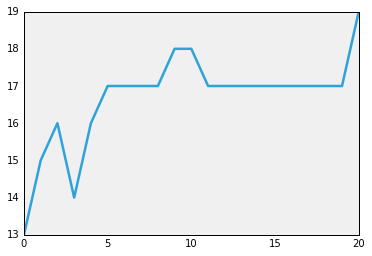

In [7]:
model_out.happy.plot()

In [8]:
agent_out = model.datacollector.get_agent_vars_dataframe()
agent_out.head()

y  x
Step AgentID      
0    (0, 2)   1  3
     (0, 3)   4  3
     (0, 4)   1  0
     (1, 0)   3  2
     (1, 1)   0  1

### Sliders

In [9]:
def sine(x, phase=0, freq=100):
    return np.sin((freq * x + phase))
phases = np.linspace(0,2*np.pi,11) # Explored phases
freqs = np.linspace(50,150,5)      # Explored frequencies
dist = np.linspace(-0.5,0.5,202)   # Linear spatial sampling
x,y = np.meshgrid(dist, dist)
grid = (x**2+y**2)                 # 2D spatial sampling

In [10]:
dimensions = ['Phase', 'Frequency']
keys = [(p,f) for p in phases for f in freqs]

b':HoloMap   [Phase,Frequency]\n   :Image   [x,y]   (Amplitude)'
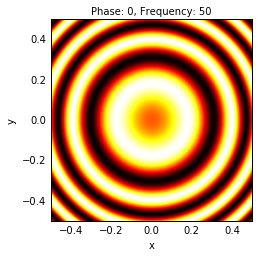
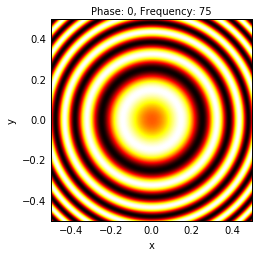
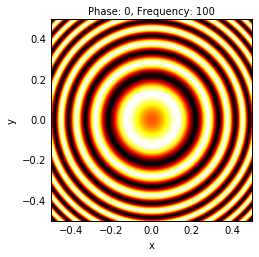
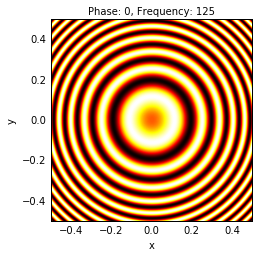
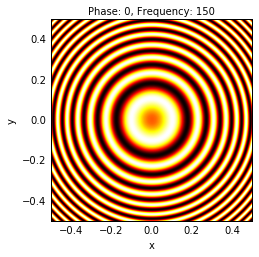
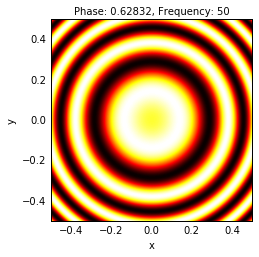
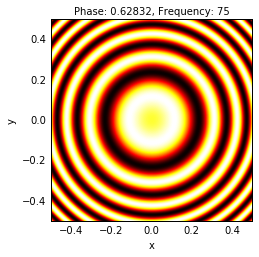
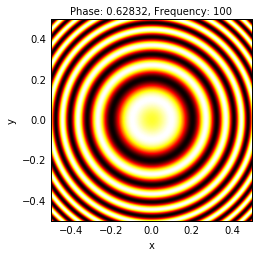
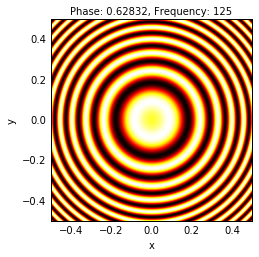
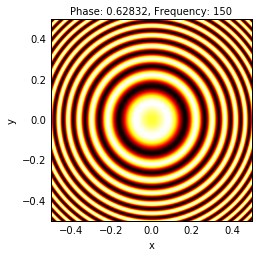
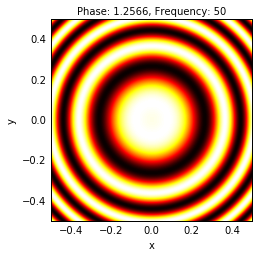
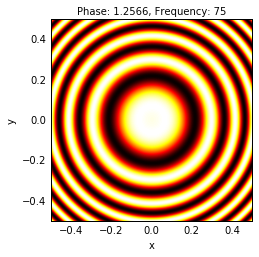
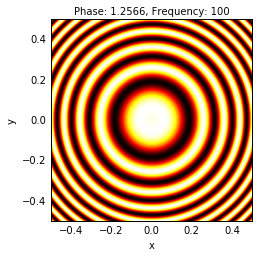
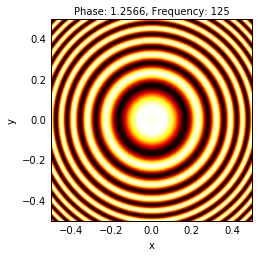
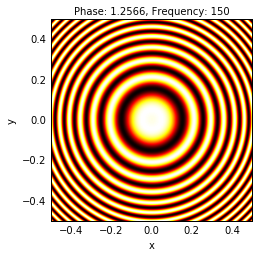
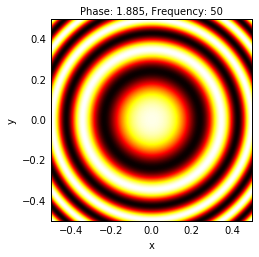
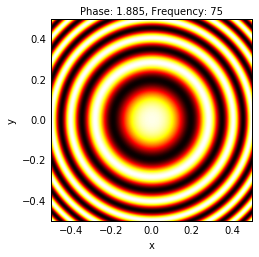
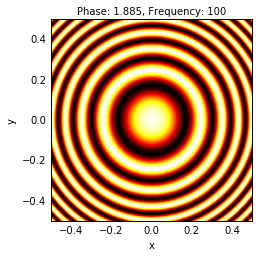
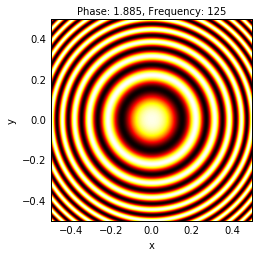
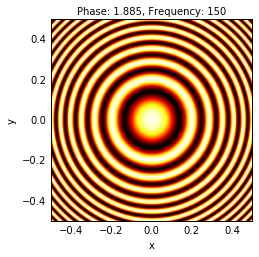
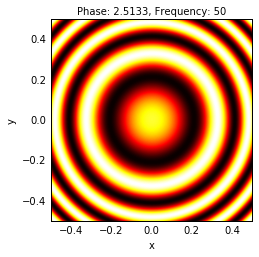
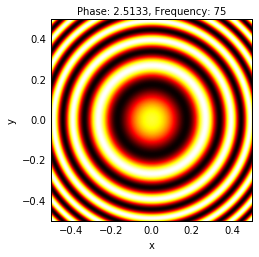
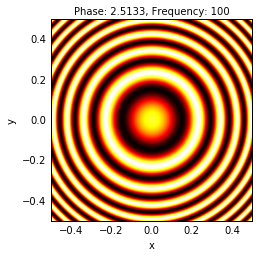
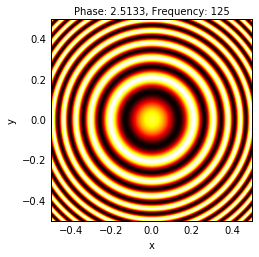
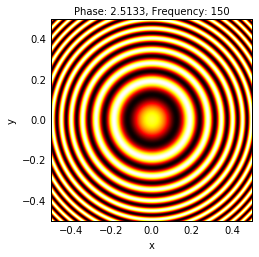
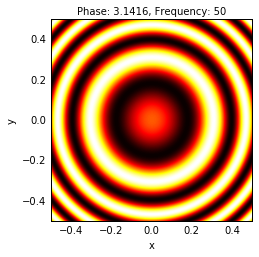
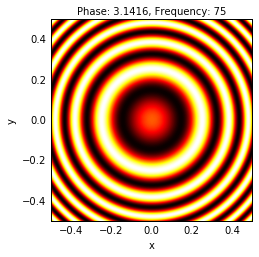
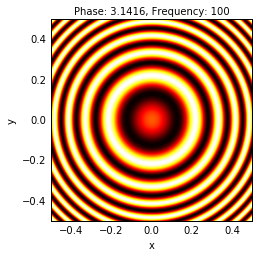
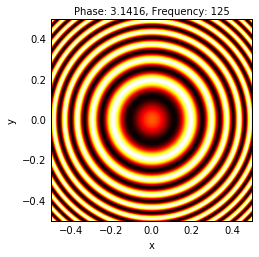
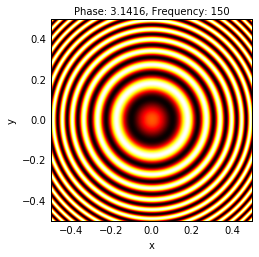
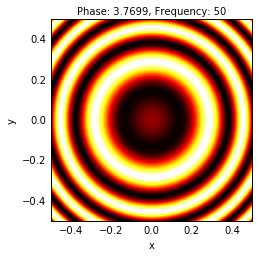
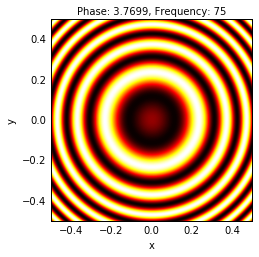
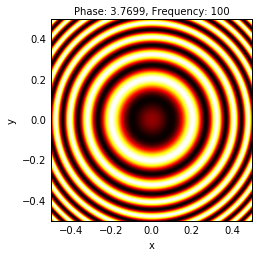
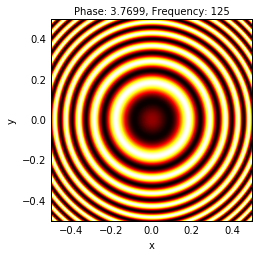
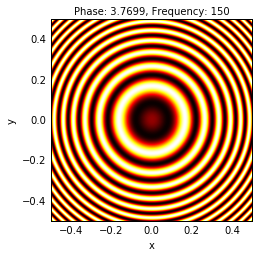
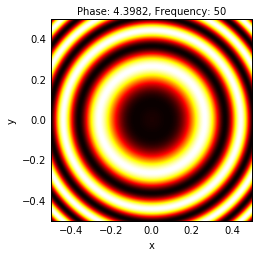
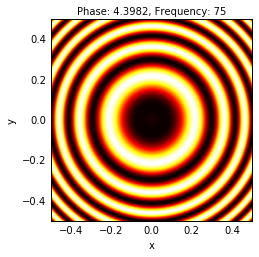
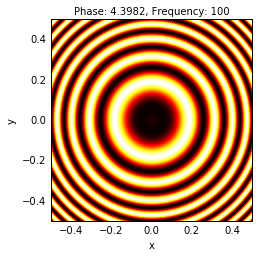
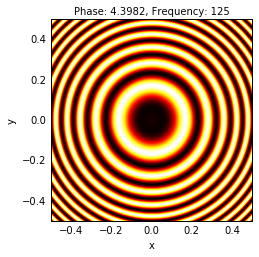
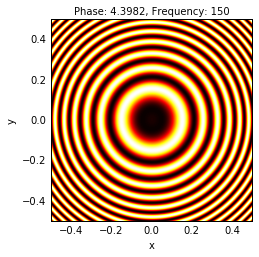
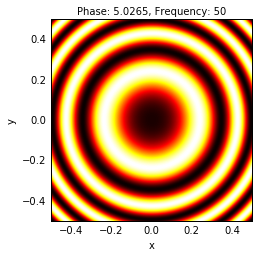
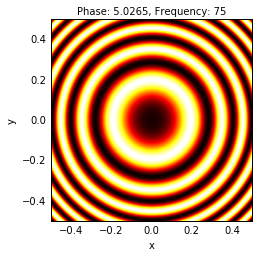
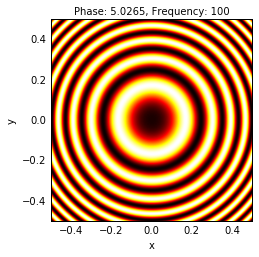
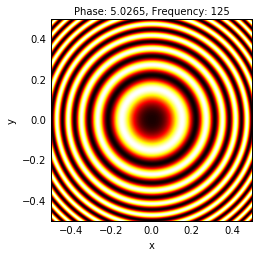
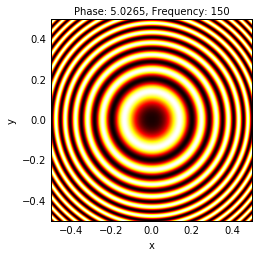
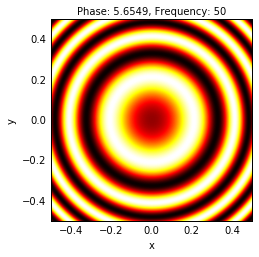
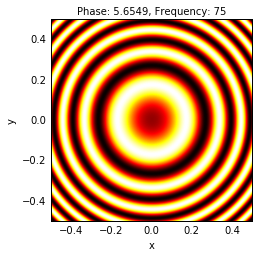
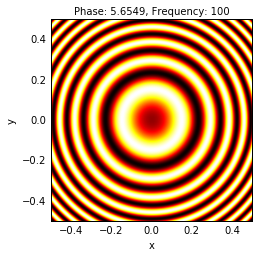
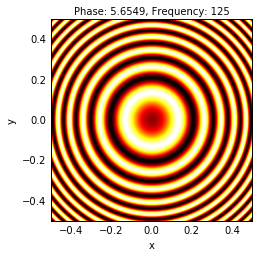
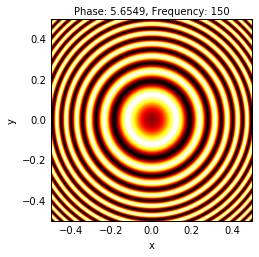
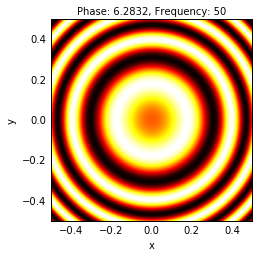
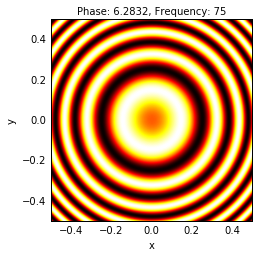
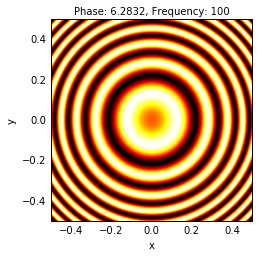
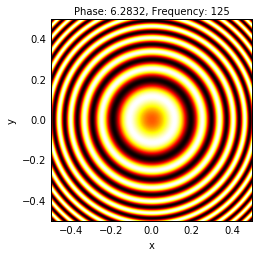
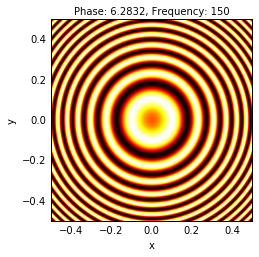

In [21]:
items = [(k, hv.Image(sine(grid, *k), vdims=['Amplitude'])) for k in keys]
circular_wave = hv.HoloMap(items, kdims=dimensions)
circular_wave

b':HoloMap   [Phase,Frequency]\n   :Image   [x,y]   (Amplitude)'
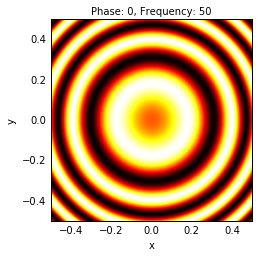
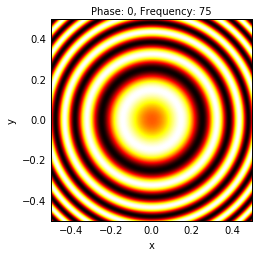
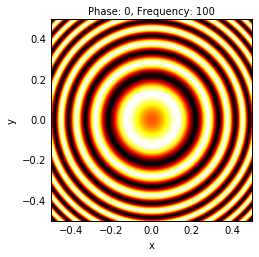
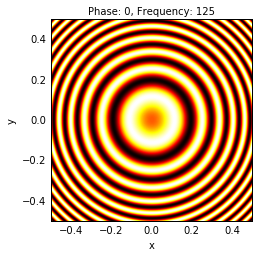
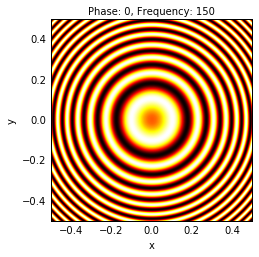
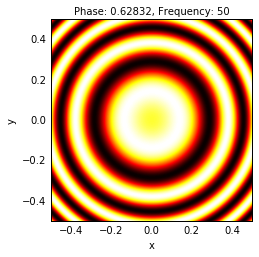
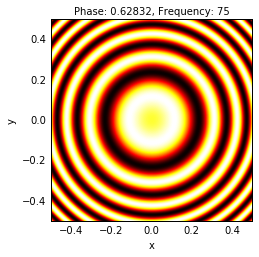
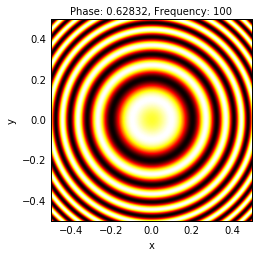
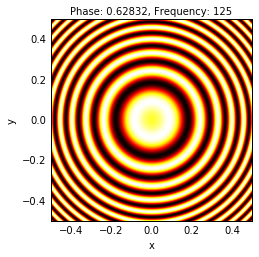
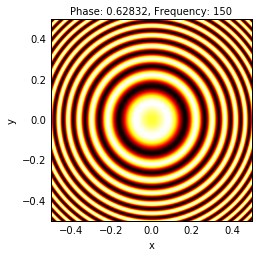
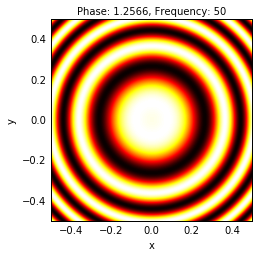
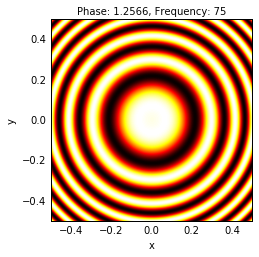
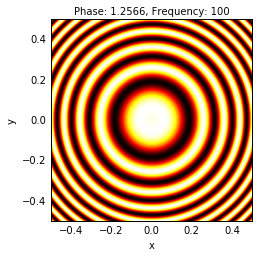
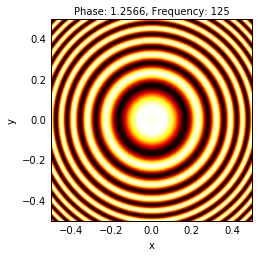
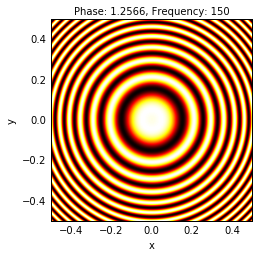
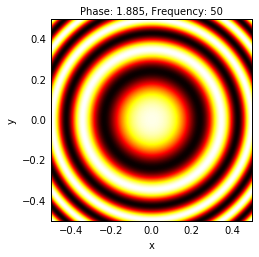
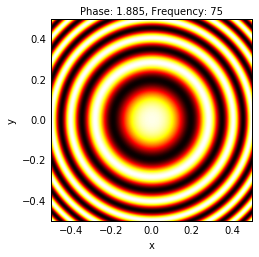
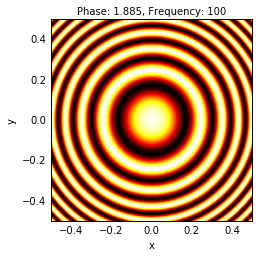
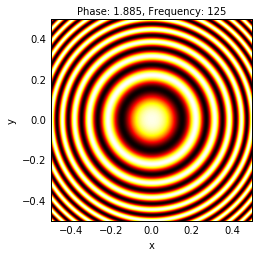
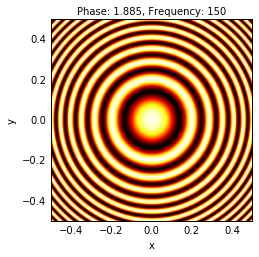
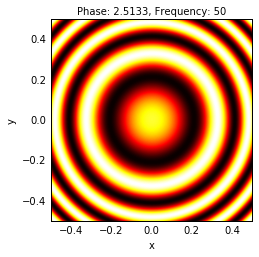
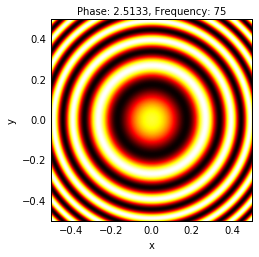
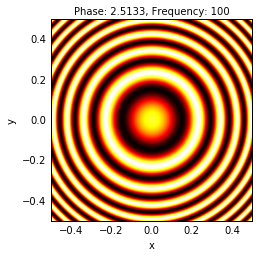
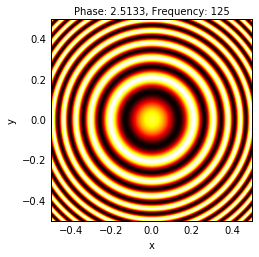
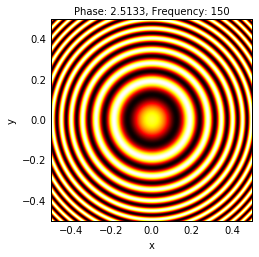
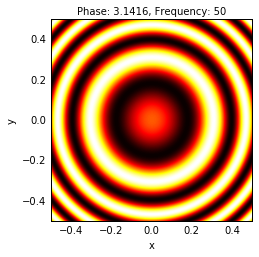
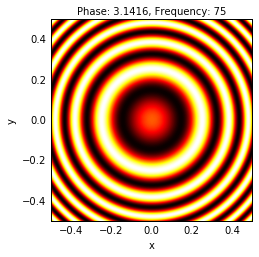
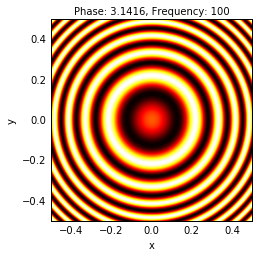
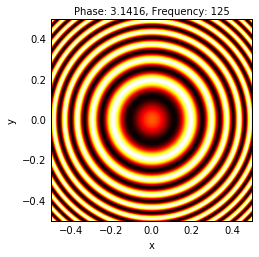
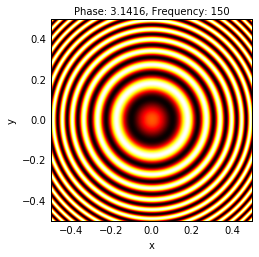
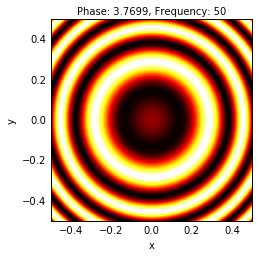
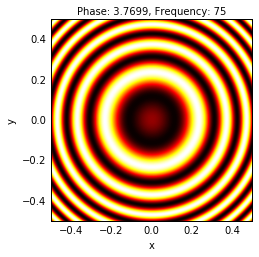
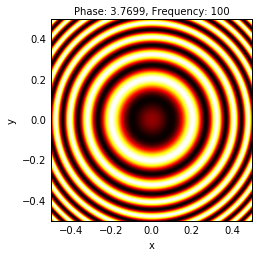
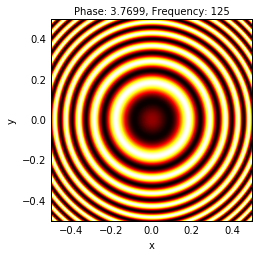
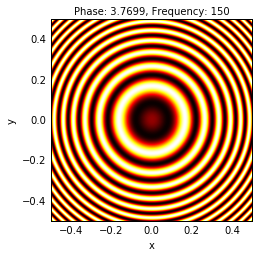
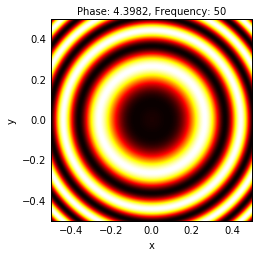
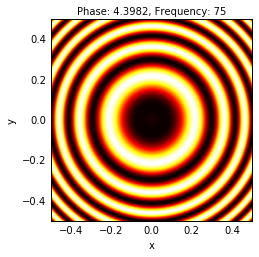
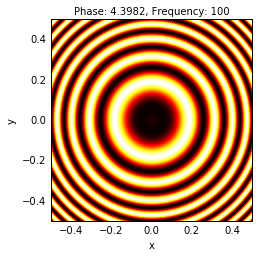
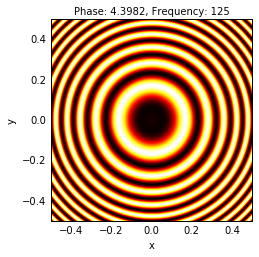
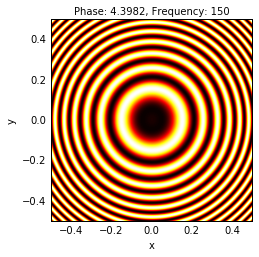
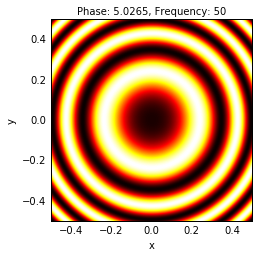
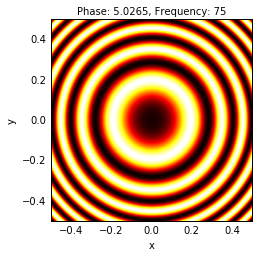
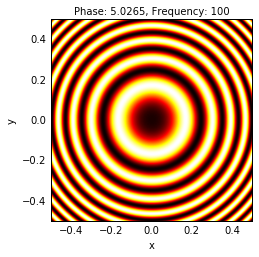
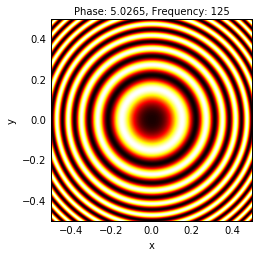
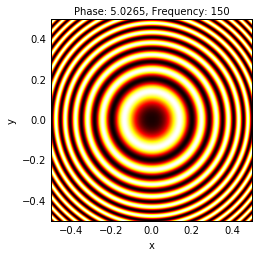
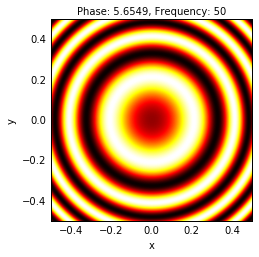
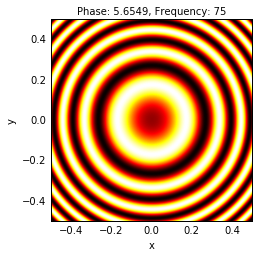
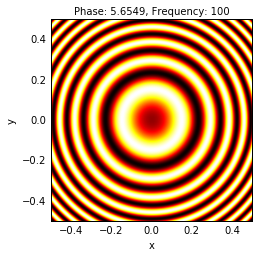
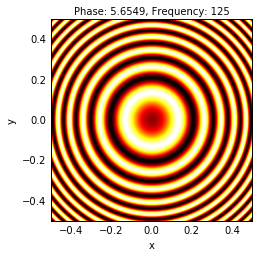
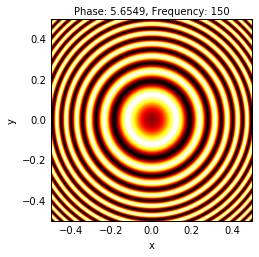
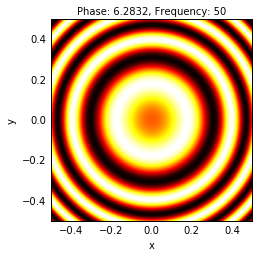
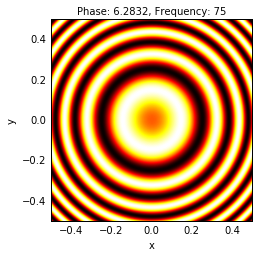
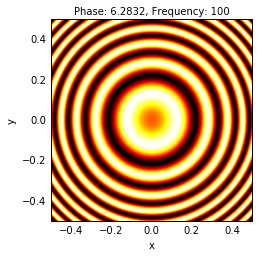
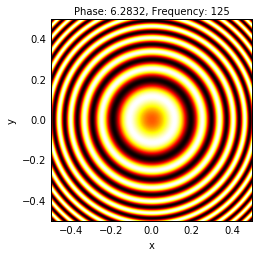
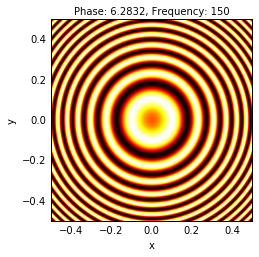

In [23]:
hv.archive.filename_formatter="{SHA:.8}"
circular_wave